Loading and analyzing data

In [2]:
# Import the pandas library for data analysis.
import pandas as pd

# File paths for the datasets
train_path = 'C:/Nauka/Koło naukowe/Exploring Mental Health/playground-series-s4e11/train.csv'
test_path = 'C:/Nauka/Koło naukowe/Exploring Mental Health/playground-series-s4e11/test.csv'
sample_submission_path = 'C:/Nauka/Koło naukowe/Exploring Mental Health/playground-series-s4e11/sample_submission.csv'

# Load the training, testing, and sample submission datasets
train_data = pd.read_csv(train_path)  # Training data containing features and labels (Depression)
test_data = pd.read_csv(test_path)    # Test data without labels (column "Depression" needs to be predicted)
sample_submission = pd.read_csv(sample_submission_path)  # File showing the required submission format

# Display the number of rows in the datasets
print(f"Number of rows in the training dataset: {train_data.shape[0]}")
print(f"Number of rows in the test dataset: {test_data.shape[0]}")

# Display basic information about the training data
print("Training dataset information:")
train_info = train_data.info()  # Information about the number of rows, data types, and missing values

print("\nTest dataset information:")
test_info = test_data.info()    # Similar information for the test dataset

# Summary statistics for the training data (including numerical and categorical values)
print("\nSummary statistics for the training dataset:")
train_describe = train_data.describe(include='all')  # Descriptive statistics: mean, min, max, etc.
print(train_describe)

# Check for missing values in the training and test datasets
print("\nNumber of missing values in the training dataset:")
train_missing = train_data.isnull().sum()  # Count of missing values in each column of the training data
print(train_missing)

print("\nNumber of missing values in the test dataset:")
test_missing = test_data.isnull().sum()    # Count of missing values in each column of the test data
print(test_missing)

# Display a preview of the first five rows of the training data
print("\nPreview of the first five rows of the training dataset:")
train_head = train_data.head()
print(train_head)

# Consolidated results - stored as a summary for analysis
results = {
    "train_info": train_info,
    "test_info": test_info,
    "train_describe": train_describe,
    "train_missing": train_missing,
    "test_missing": test_missing,
    "train_head": train_head,
}

results


Number of rows in the training dataset: 140700
Number of rows in the test dataset: 93800
Training dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA  

{'train_info': None,
 'test_info': None,
 'train_describe':                    id    Name  Gender            Age    City  \
 count   140700.000000  140700  140700  140700.000000  140700   
 unique            NaN     422       2            NaN      98   
 top               NaN   Rohan    Male            NaN  Kalyan   
 freq              NaN    3178   77464            NaN    6591   
 mean     70349.500000     NaN     NaN      40.388621     NaN   
 std      40616.735775     NaN     NaN      12.384099     NaN   
 min          0.000000     NaN     NaN      18.000000     NaN   
 25%      35174.750000     NaN     NaN      29.000000     NaN   
 50%      70349.500000     NaN     NaN      42.000000     NaN   
 75%     105524.250000     NaN     NaN      51.000000     NaN   
 max     140699.000000     NaN     NaN      60.000000     NaN   
 
        Working Professional or Student Profession  Academic Pressure  \
 count                           140700     104070       27897.000000   
 unique      

Histograms and boxplots for numerical features. Analysis of categorical feature distributions using bar charts.

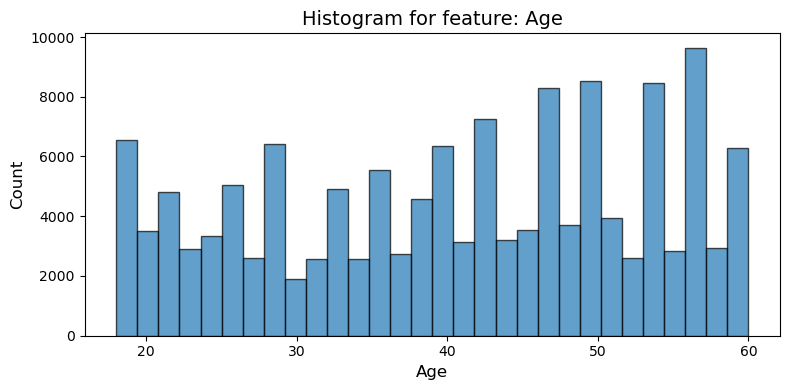

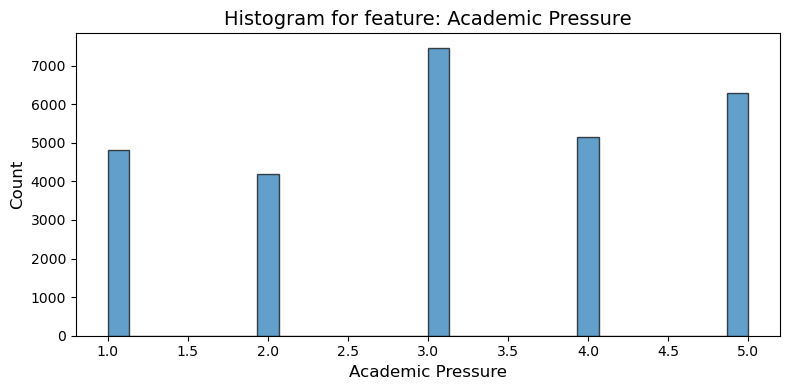

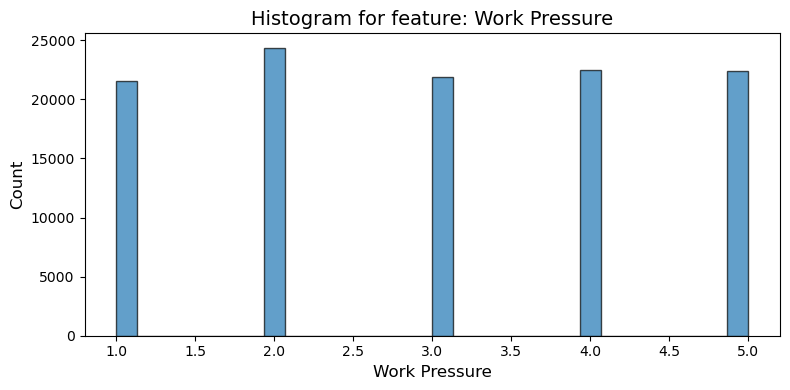

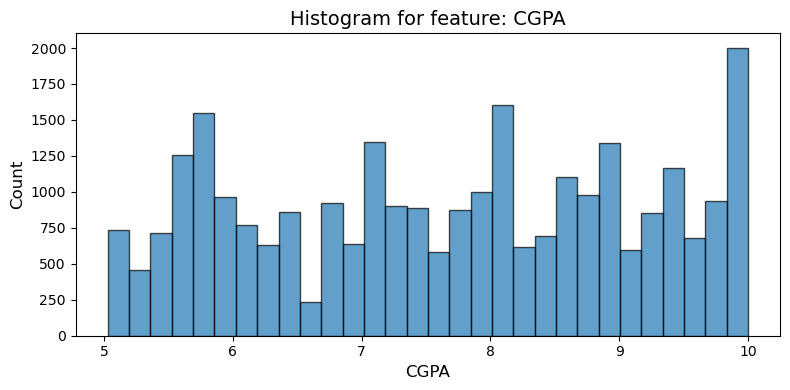

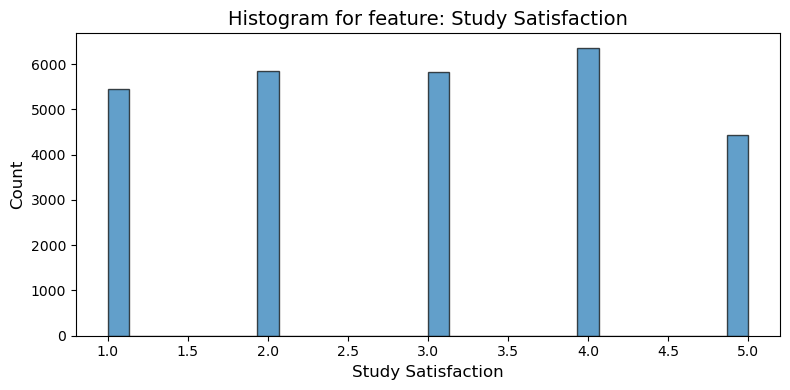

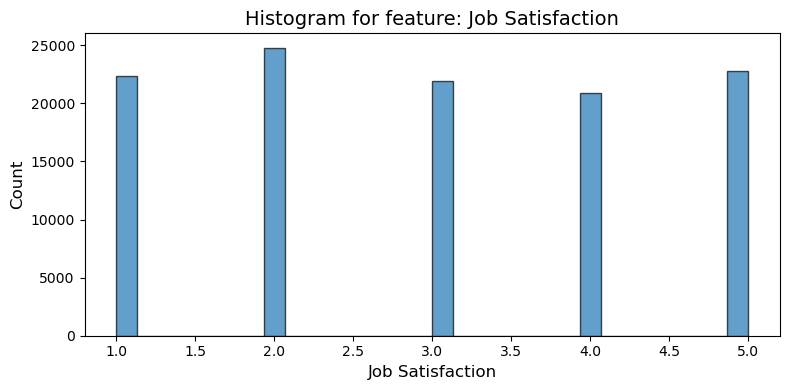

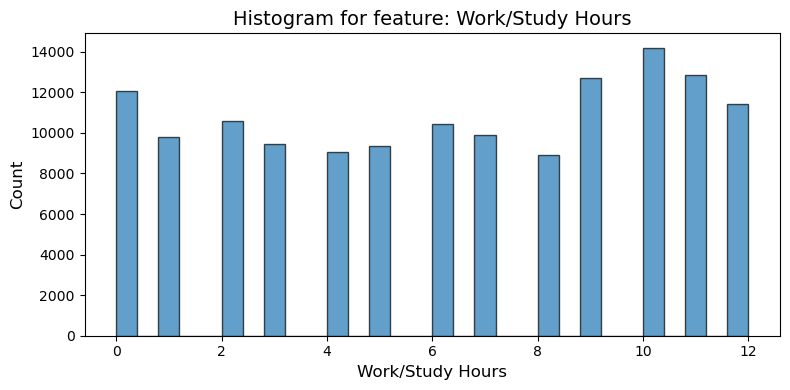

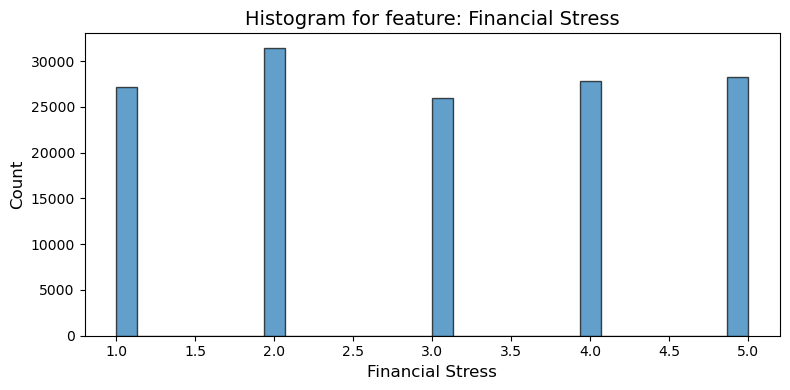

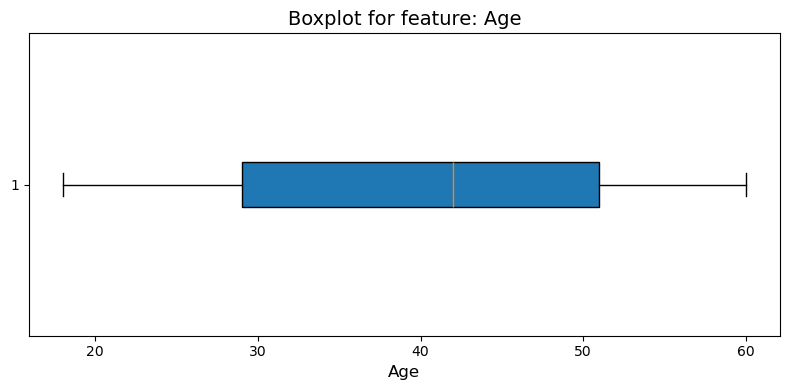

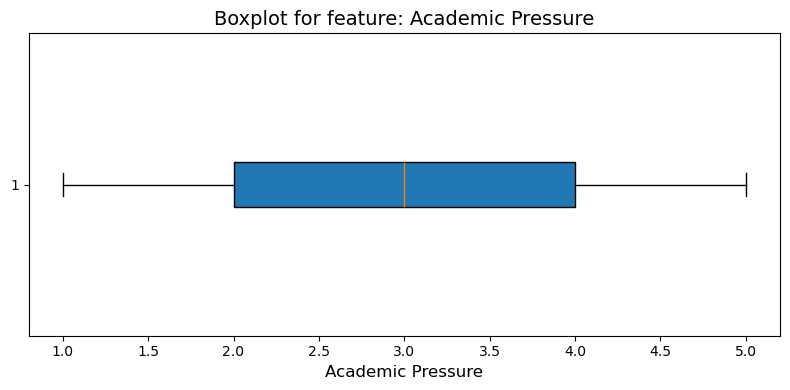

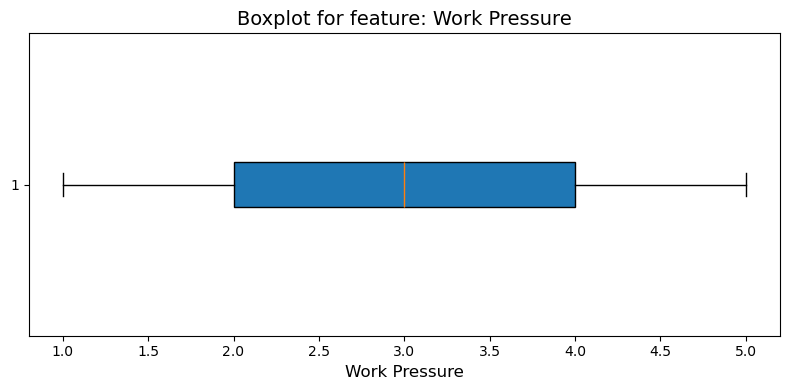

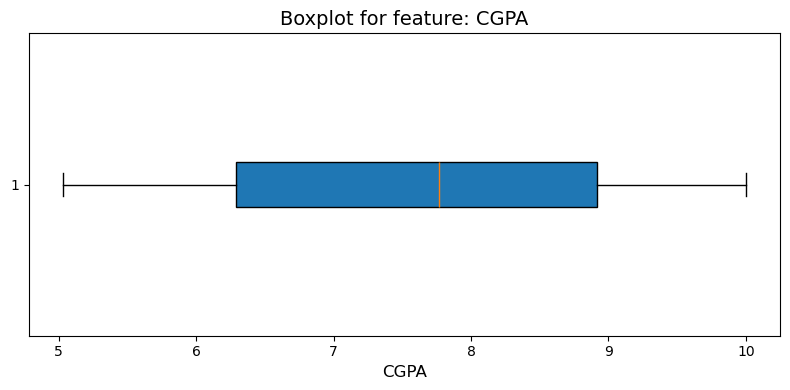

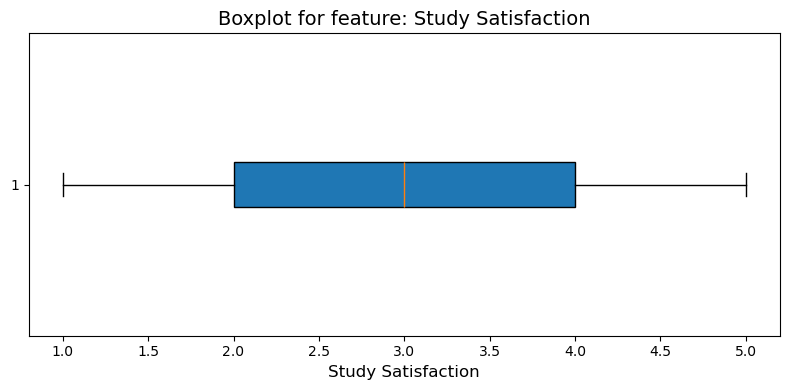

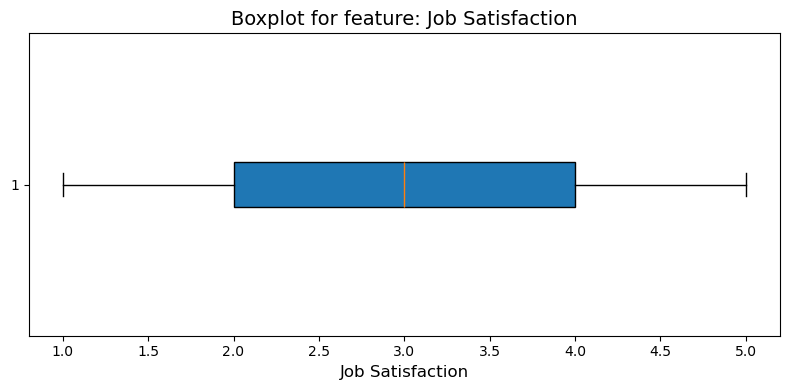

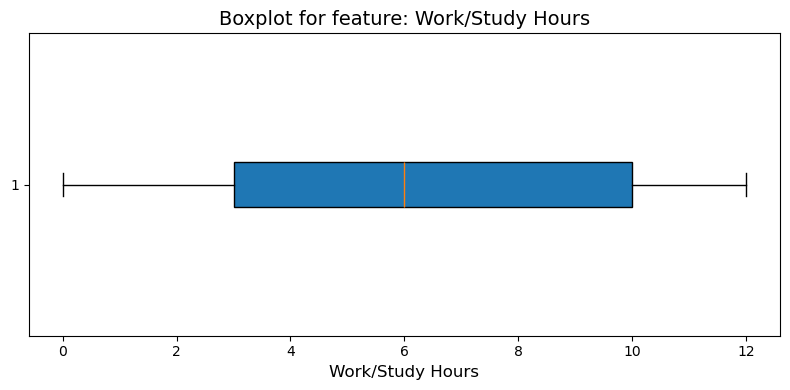

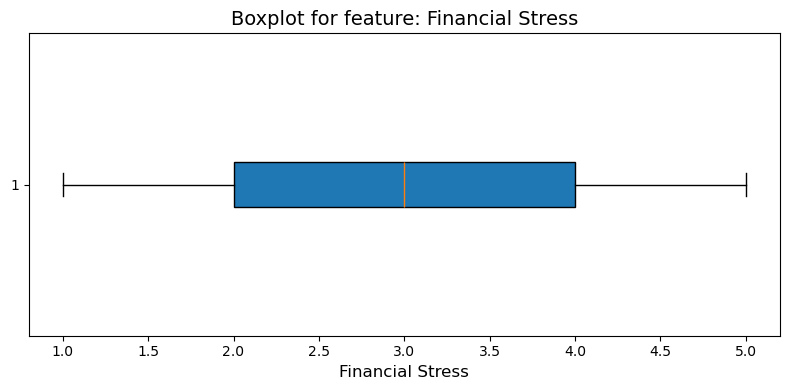

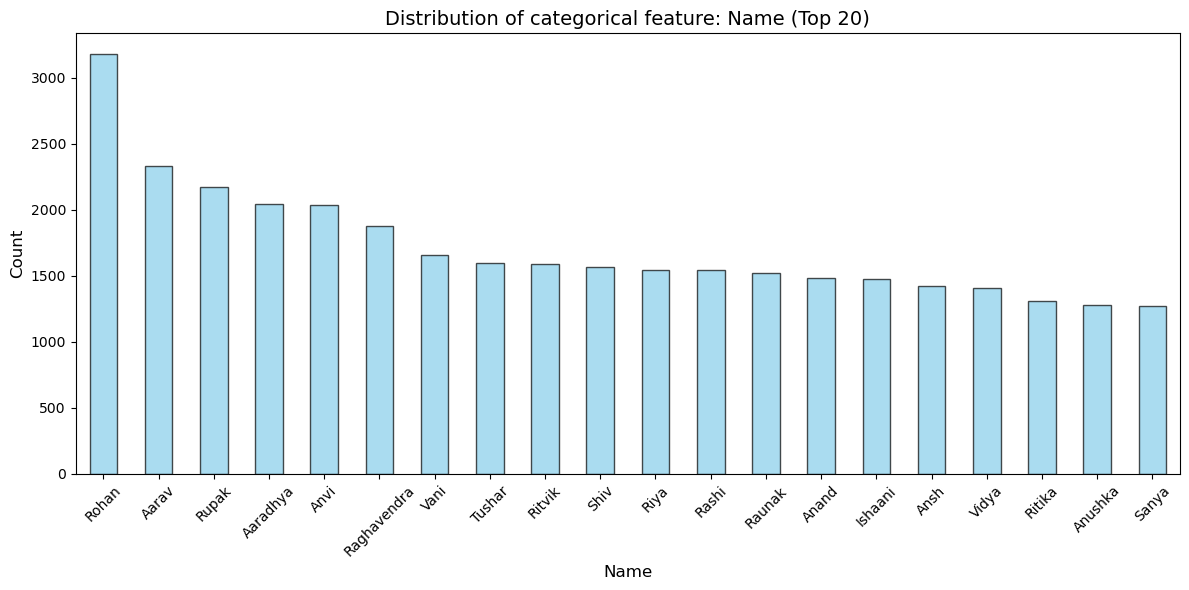

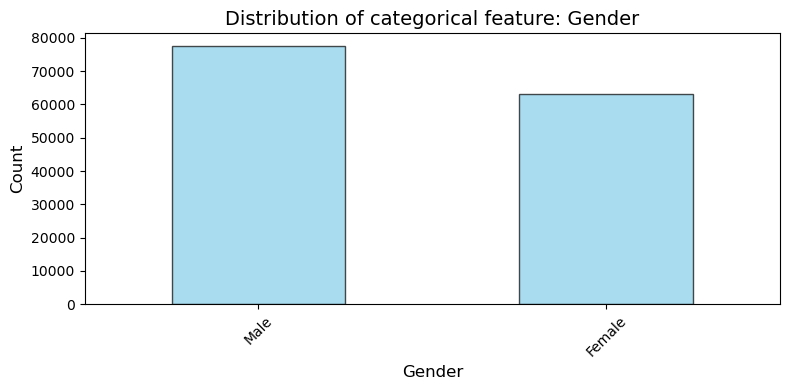

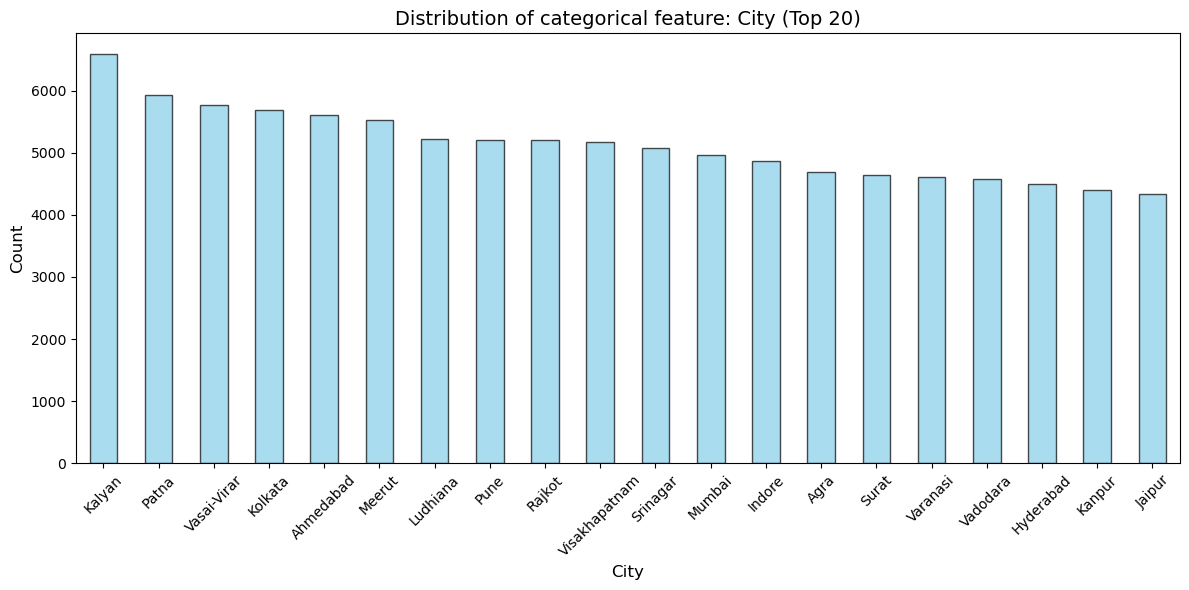

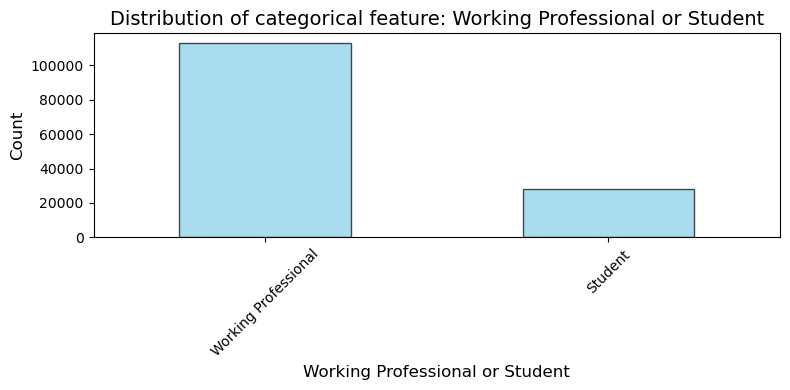

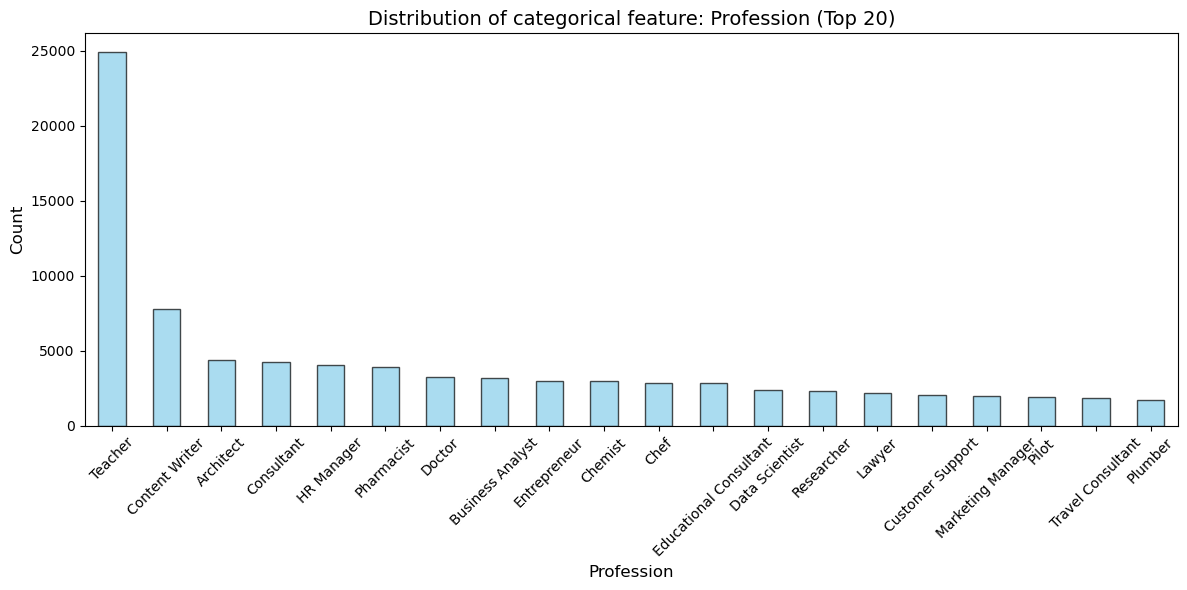

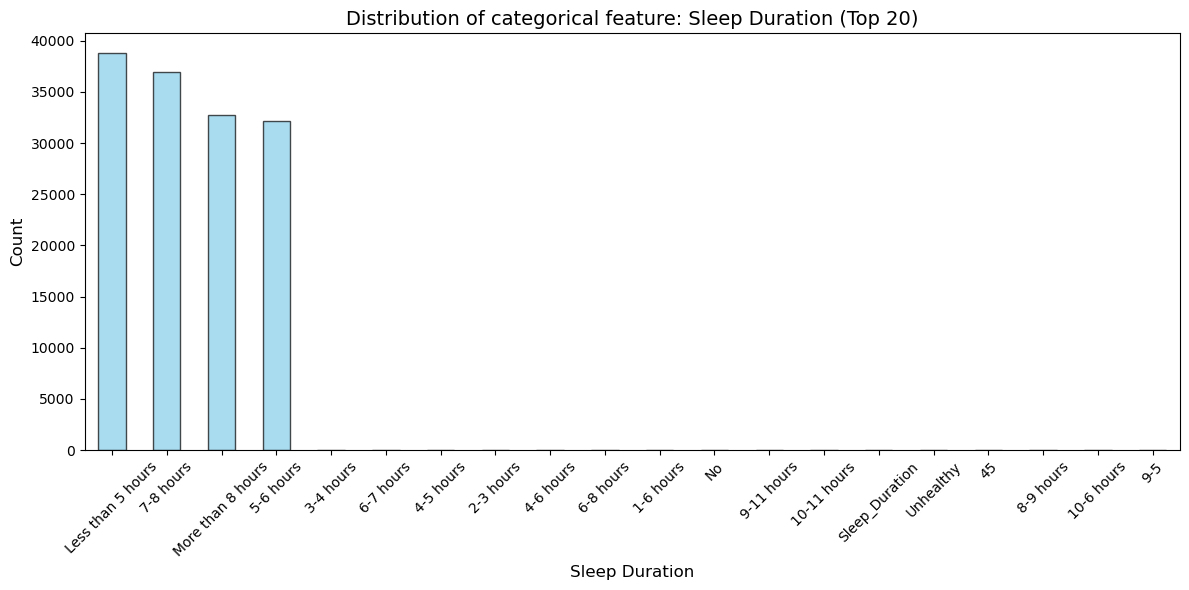

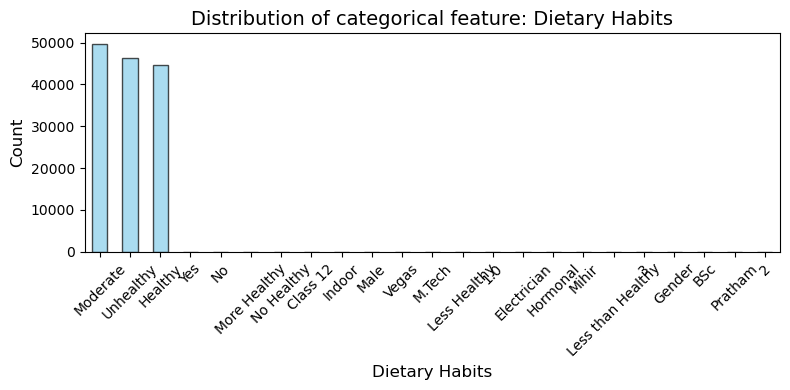

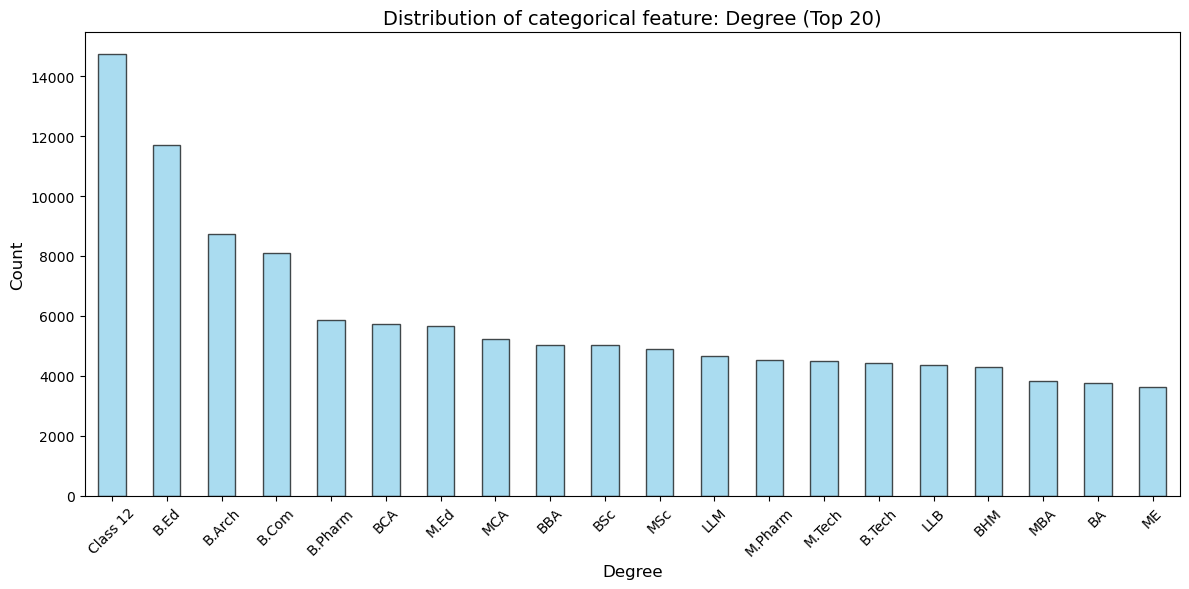

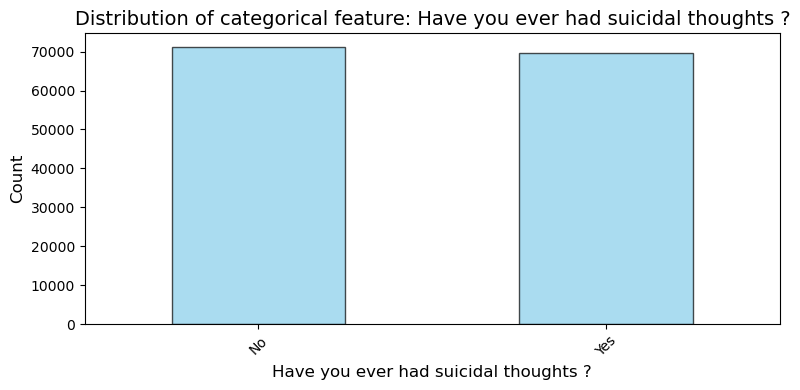

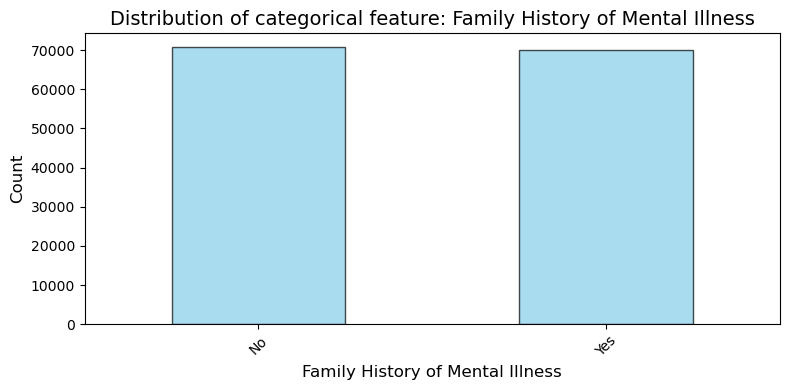

In [4]:
import matplotlib.pyplot as plt

# List of numerical and categorical features from the training data
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Removing the target column and identifier (ID) from the numerical features list
numerical_features.remove('id')  # The ID column is an identifier
numerical_features.remove('Depression')  # 'Depression' is the target variable, so we exclude it here

# ---- Analysis of numerical features ----
# Creating histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Plot size
    plt.hist(train_data[feature].dropna(), bins=30, edgecolor='k', alpha=0.7)  # Histogram
    plt.title(f'Histogram for feature: {feature}', fontsize=14)  # Plot title
    plt.xlabel(feature, fontsize=12)  # X-axis label
    plt.ylabel('Count', fontsize=12)  # Y-axis label
    plt.tight_layout()  # Automatic adjustment
    plt.show()  # Display the plot

# Creating boxplots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Plot size
    plt.boxplot(train_data[feature].dropna(), vert=False, patch_artist=True)  # Horizontal boxplot
    plt.title(f'Boxplot for feature: {feature}', fontsize=14)  # Plot title
    plt.xlabel(feature, fontsize=12)  # X-axis label
    plt.tight_layout()  # Automatic adjustment
    plt.show()  # Display the plot

# ---- Analysis of categorical features ----
# List of selected categorical features for clearer analysis
selected_categorical_features = ['Profession', 'City', 'Degree', 'Name', 'Sleep Duration']

# Creating bar charts for categorical features
for feature in categorical_features:
    if feature in selected_categorical_features:
        plt.figure(figsize=(12, 6))  # Larger plot size for selected features
        value_counts = train_data[feature].value_counts().head(20)  # Display only the top 20 most frequent categories
        value_counts.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)  # Bar chart
        plt.title(f'Distribution of categorical feature: {feature} (Top 20)', fontsize=14)  # Plot title
        plt.xlabel(feature, fontsize=12)  # X-axis label
        plt.ylabel('Count', fontsize=12)  # Y-axis label
        plt.xticks(rotation=45, fontsize=10)  # Rotate X-axis labels
        plt.tight_layout()  # Automatic adjustment
        plt.show()  # Display the plot
    else:
        plt.figure(figsize=(8, 4))  # Plot size for other features
        train_data[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
        plt.title(f'Distribution of categorical feature: {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()


Sprawdzenie równowagi klas:

Przeanalizuj rozkład zmiennej docelowej (e vs p), aby sprawdzić, czy klasy są zbalansowane.

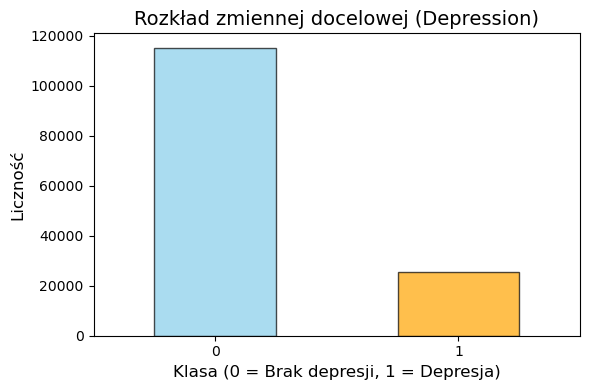

Depression
0    81.828714
1    18.171286
Name: count, dtype: float64

In [7]:
# Sprawdzenie rozkładu zmiennej docelowej 'Depression'
plt.figure(figsize=(6, 4))  # Rozmiar wykresu
class_counts = train_data['Depression'].value_counts()  # Liczba wystąpień każdej klasy
class_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='k', alpha=0.7)  # Wykres słupkowy
plt.title('Rozkład zmiennej docelowej (Depression)', fontsize=14)  # Tytuł wykresu
plt.xlabel('Klasa (0 = Brak depresji, 1 = Depresja)', fontsize=12)  # Opis osi X
plt.ylabel('Liczność', fontsize=12)  # Opis osi Y
plt.xticks(rotation=0, fontsize=10)  # Rotacja etykiet osi X
plt.tight_layout()  # Automatyczne dostosowanie elementów wykresu
plt.show()

# Wyświetlenie procentowego udziału każdej klasy
class_percentages = (class_counts / class_counts.sum()) * 100
class_percentages

Calculating class weights and their implementation in machine learning models

In [11]:
# Importing libraries
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculating class weights based on the distribution of the target variable
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically calculate weights
    classes=np.array([0, 1]),  # Convert list to a numpy array
    y=train_data['Depression']  # Target variable
)

# Converting weights to a dictionary (for convenience and compatibility with models)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Displaying the calculated class weights
print("Class weights:")
print(class_weight_dict)

# ---- Implementing class weights in models ----

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(
    class_weight=class_weight_dict,  # Passing class weights
    random_state=42  # For reproducibility
)
# logistic_model.fit(X, y)  # Train the model (uncomment when X and y are prepared)

# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    class_weight=class_weight_dict,  # Passing class weights
    random_state=42  # For reproducibility
)
# rf_model.fit(X, y)  # Train the model (uncomment when X and y are prepared)

# 3. XGBoost
from xgboost import XGBClassifier

# XGBoost uses the parameter 'scale_pos_weight' instead of traditional class weights
scale_pos_weight = class_weight_dict[1] / class_weight_dict[0]
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Use the ratio of weights
    random_state=42  # For reproducibility
)
# xgb_model.fit(X, y)  # Train the model (uncomment when X and y are prepared)

# 4. LightGBM
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    class_weight='balanced',  # Automatically handle class weights
    random_state=42  # For reproducibility
)
# lgbm_model.fit(X, y)  # Train the model (uncomment when X and y are prepared)

# Note:
# The `fit(X, y)` functions are commented out because we assume that the data 
# (X - features, y - target variable) will be prepared for training at a later stage.


Class weights:
{0: 0.6110324581136598, 1: 2.7515938514491336}


Identifying Artifacts in Data: Outliers, Correlations, and Patterns in Numerical Features

Feature: Age - Number of outliers: 0
Feature: Academic Pressure - Number of outliers: 0
Feature: Work Pressure - Number of outliers: 0
Feature: CGPA - Number of outliers: 0
Feature: Study Satisfaction - Number of outliers: 0
Feature: Job Satisfaction - Number of outliers: 0
Feature: Work/Study Hours - Number of outliers: 0
Feature: Financial Stress - Number of outliers: 0


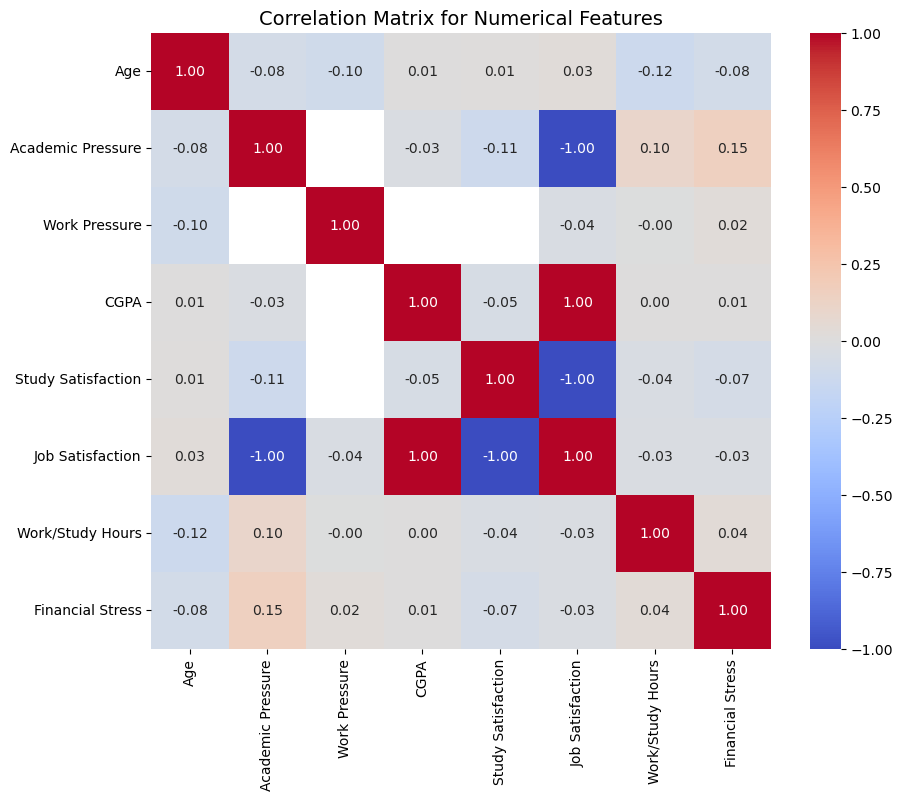

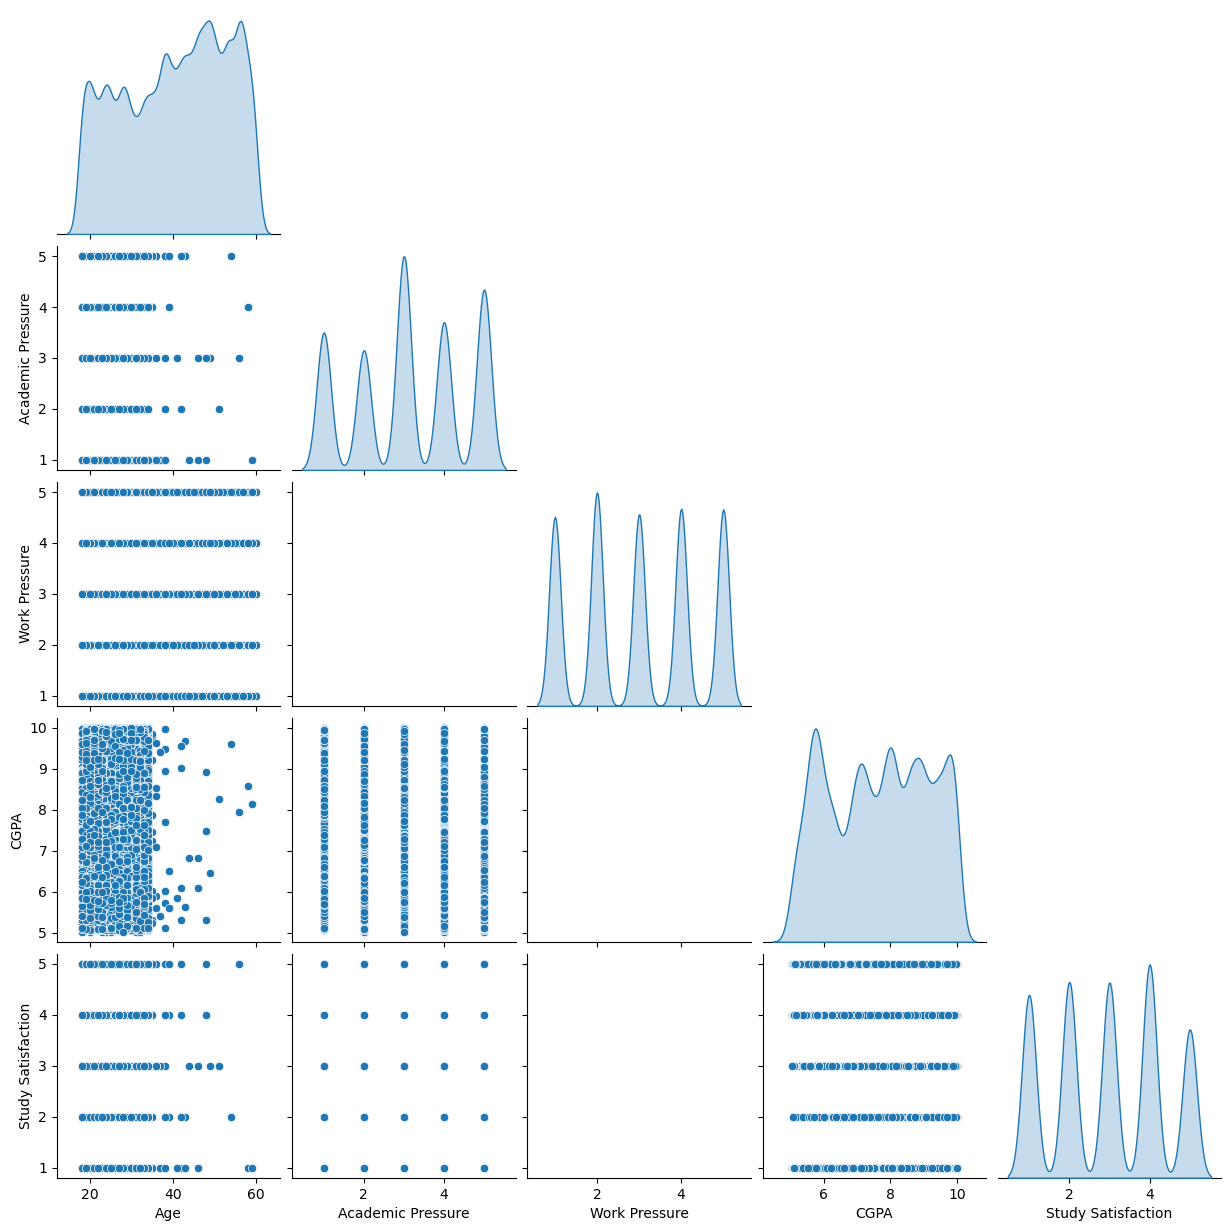

Number of outliers in numerical features: {'Age': 0, 'Academic Pressure': 0, 'Work Pressure': 0, 'CGPA': 0, 'Study Satisfaction': 0, 'Job Satisfaction': 0, 'Work/Study Hours': 0, 'Financial Stress': 0}


In [14]:
# Importing libraries
import seaborn as sns  # Library for data visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical calculations

# List of numerical features from the training data
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove columns that are not numerical features for analysis (e.g., ID and target variable)
numerical_features.remove('id')  # ID column
numerical_features.remove('Depression')  # Target variable

# ---- Identifying Outliers ----
# Function to detect outliers using the IQR (Interquartile Range) method
def detect_outliers(data, feature):
    Q1 = np.percentile(data[feature].dropna(), 25)  # First quartile (25%)
    Q3 = np.percentile(data[feature].dropna(), 75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for typical values
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for typical values
    # Find values below the lower bound or above the upper bound
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers  # Return outlier data

# Analyze outliers for each numerical feature
outliers_dict = {}  # Dictionary to store the number of outliers for each feature
for feature in numerical_features:  # Iterate through all numerical features
    outliers = detect_outliers(train_data, feature)  # Detect outliers
    outliers_dict[feature] = len(outliers)  # Save the number of outliers
    print(f'Feature: {feature} - Number of outliers: {len(outliers)}')  # Display the result

# ---- Correlation Analysis ----
# Create a correlation matrix for numerical features
correlation_matrix = train_data[numerical_features].corr()  # Calculate correlation coefficients

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set plot size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)  # Heatmap with value annotations
plt.title('Correlation Matrix for Numerical Features', fontsize=14)  # Plot title
plt.show()  # Display the plot

# ---- Pairplot Analysis ----
# Select a few features for visualization (for readability, not all features are shown)
selected_features = numerical_features[:5]  # Select the first 5 features (adjustable)
sns.pairplot(train_data, vars=selected_features, diag_kind='kde', corner=True)  # Pairplot with KDE on the diagonal
plt.show()  # Display the plot

# ---- Summary of Results ----
# Display the number of outliers in numerical features
print("Number of outliers in numerical features:", outliers_dict)


Preprocessing of Training and Testing Data

In [16]:
# Import required libraries
import pandas as pd

# Paths to data
train_path = 'C:/Nauka/Koło naukowe/Exploring Mental Health/playground-series-s4e11/train.csv'
test_path = 'C:/Nauka/Koło naukowe/Exploring Mental Health/playground-series-s4e11/test.csv'

# Load data
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Data information
print(f"Number of rows in the training dataset (train_data): {len(train_data)}")
print(f"Number of rows in the testing dataset (test_data): {len(test_data)}")

# Removing outliers in the 'Age' column (range 0-100)
if 'Age' in train_data.columns:
    before_outliers = len(train_data)
    train_data = train_data[(train_data['Age'] >= 0) & (train_data['Age'] <= 100)]
    after_outliers = len(train_data)
    print(f"Number of rows removed due to outliers in the 'Age' column: {before_outliers - after_outliers}")

# Normalize text in categorical features (lowercase, remove spaces)
categorical_features_train = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_features_test = test_data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features_train:
    train_data[feature] = train_data[feature].str.lower().str.strip()

for feature in categorical_features_test:
    test_data[feature] = test_data[feature].str.lower().str.strip()

# Shuffle the training data (test data remains untouched)
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print("The training data has been shuffled.")

# Split features (X_train) and target variable (y_train) in the training data
X_train = train_data.drop(columns=['Depression'])  # Keep the ID column in the features
y_train = train_data['Depression']  # Target variable

# Prepare test data (without target variable)
X_test = test_data  # ID column remains in the test data

# Display the number of rows in each dataset
print(f"\nNumber of rows in the training dataset (X_train + y_train): {len(train_data)}")
print(f"Number of rows in the testing dataset (X_test): {len(test_data)}")

# Output folder path
output_folder = 'C:/Nauka/Koło naukowe/Exploring Mental Health/'

# Save processed data to CSV files
X_train.to_csv(f'{output_folder}/processed_X_train.csv', index=False)
y_train.to_csv(f'{output_folder}/processed_y_train.csv', index=False)
X_test.to_csv(f'{output_folder}/processed_X_test.csv', index=False)

print("\nProcessed data has been saved to CSV files.")


Number of rows in the training dataset (train_data): 140700
Number of rows in the testing dataset (test_data): 93800
Number of rows removed due to outliers in the 'Age' column: 0
The training data has been shuffled.

Number of rows in the training dataset (X_train + y_train): 140700
Number of rows in the testing dataset (X_test): 93800

Processed data has been saved to CSV files.


Model Selection and Training

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Learning rate
    max_depth=6,             # Maximum tree depth
    random_state=42          # Reproducibility
)

# Perform cross-validation and compute average scores
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='roc_auc')

print(f"Average ROC-AUC from 5-Fold Cross-Validation: {cv_scores.mean():.4f}")
print(f"Standard Deviation of ROC-AUC: {cv_scores.std():.4f}")

# After cross-validation, retrain the model on the full training set
xgb_model.fit(X_train, y_train)

# Evaluate the model on the full training set
y_train_pred = xgb_model.predict(X_train)
y_train_pred_proba = xgb_model.predict_proba(X_train)[:, 1]

# Calculate metrics on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("\nModel results on the training set:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1-score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")
print("\nClassification report on the training set:")
print(classification_report(y_train, y_train_pred))

# Predictions on the test set remain the same
y_test_pred = xgb_model.predict(X_test)

# Prepare and save the submission file
submission = pd.DataFrame({
    'id': test_ids,
    'Depression': y_test_pred
})
submission.to_csv(f'{output_folder}/submission.csv', index=False)
print(f"\nThe file `submission.csv` has been saved to the folder: {output_folder}")


Average ROC-AUC from 5-Fold Cross-Validation: 0.9748
Standard Deviation of ROC-AUC: 0.0010

Model results on the training set:
Accuracy: 0.9446
F1-score: 0.8454
ROC-AUC: 0.9802

Classification report on the training set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    115133
           1       0.86      0.83      0.85     25567

    accuracy                           0.94    140700
   macro avg       0.91      0.90      0.91    140700
weighted avg       0.94      0.94      0.94    140700


The file `submission.csv` has been saved to the folder: C:/Nauka/Koło naukowe/Exploring Mental Health/
